In [2]:
import os
import random
from PIL import Image, ExifTags
import shutil
from ultralytics import YOLO
import torch, torchvision, torchaudio

In [5]:

IMAGE_DIR = 'C:/Users/vardh/Desktop/Traffic_Signs/GTSDB-german-traffic-sign/images/'   # folder for both original and processed images
LABEL_DIR = 'C:/Users/vardh/Desktop/Traffic_Signs/GTSDB-german-traffic-sign/labels/'   # folder for YOLO labels (.txt)
os.makedirs(IMAGE_DIR, exist_ok=True)
os.makedirs(LABEL_DIR, exist_ok=True)


def auto_orient(img):
    try:
        for orientation in ExifTags.TAGS.keys():
            if ExifTags.TAGS[orientation] == 'Orientation':
                break
        exif = img._getexif()
        if exif is not None:
            orientation = exif.get(orientation, None)
            if orientation == 3:
                img = img.rotate(180, expand=True)
            elif orientation == 6:
                img = img.rotate(270, expand=True)
            elif orientation == 8:
                img = img.rotate(90, expand=True)
    except Exception as e:
        print(f"[EXIF] Orientation handling error: {e}")
    return img


for filename in os.listdir(IMAGE_DIR):
    if not filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue

    if '_original' in filename or '_aug' in filename:
        continue

    base = os.path.splitext(filename)[0]
    img_path = os.path.join(IMAGE_DIR, filename)
    label_path = os.path.join(LABEL_DIR, f"{base}.txt")

    if not os.path.exists(label_path):
        print(f"[WARNING] No label for {filename}, skipping.")
        continue


    img = Image.open(img_path).convert('RGB')
    img = auto_orient(img)

    
    img_resized = img.resize((256, 256), Image.BICUBIC)
    new_base = f"{base}_original"
    img_resized.save(os.path.join(IMAGE_DIR, new_base + ".jpg"))
    shutil.copy(label_path, os.path.join(LABEL_DIR, new_base + ".txt"))

    
    for i in range(2):
        angle = random.uniform(-15, 15)
        rotated = img.rotate(angle, resample=Image.BICUBIC, expand=True)
        rotated_resized = rotated.resize((256, 256), Image.BICUBIC)

        aug_base = f"{base}_aug{i+1}"
        rotated_resized.save(os.path.join(IMAGE_DIR, aug_base + ".jpg"))
        shutil.copy(label_path, os.path.join(LABEL_DIR, aug_base + ".txt"))

    print(f"[✓] Processed {filename} → original + 2 augmentations")
data = 'C:/Users/vardh/Desktop/Traffic_Signs/GTSDB-german-traffic-sign/data.yaml'

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

yolo_model = YOLO('yolov8n.pt')

print("Using:", device)
yolo_model.train(
    data= data,
    epochs = 3,
    imgsz = 256,
    device = device,
    batch = 64,
    mosaic = 1.0,
    translate = 0.4,
    scale = 0.4,
    hsv_h = 0.1,
    hsv_s = 0.7,
    hsv_v = 0.4,
    fliplr = 0.5,
    mixup = 0.3,
    name = 'the_yolov8n_model'
    )



Using: cuda
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:/Users/vardh/Desktop/Traffic_Signs/GTSDB-german-traffic-sign/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.1, hsv_s=0.7, hsv_v=0.4, imgsz=256, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.3, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=the_yolov8n_model8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=Fa

train: Scanning C:\Users\vardh\Desktop\Traffic_Signs\GTSDB-german-traffic-sign\labels\train.cache... 27445 images, 0 backgrounds, 0 corrupt: 100%|██████████| 27445/27445 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 28.821.4 MB/s, size: 2.1 KB)


val: Scanning C:\Users\vardh\Desktop\Traffic_Signs\GTSDB-german-traffic-sign\labels\val.cache... 5882 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5882/5882 [00:00<?, ?it/s]


Plotting labels to runs\detect\the_yolov8n_model8\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000213, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 8 dataloader workers
Logging results to runs\detect\the_yolov8n_model8
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      1.44G      1.095      3.704      1.347        168        256: 100%|██████████| 429/429 [00:43<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:15<00:00,  2.93it/s]

                   all       5882       5882      0.541      0.418      0.275      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      1.79G     0.8279       2.26      1.216        156        256: 100%|██████████| 429/429 [00:45<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.82it/s]

                   all       5882       5882      0.626      0.595      0.597      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      1.79G     0.7298      1.738      1.148        168        256: 100%|██████████| 429/429 [00:45<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.82it/s]

                   all       5882       5882      0.699      0.754      0.764      0.665



3 epochs completed in 0.051 hours.
Optimizer stripped from runs\detect\the_yolov8n_model8\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\the_yolov8n_model8\weights\best.pt, 6.2MB

Validating runs\detect\the_yolov8n_model8\weights\best.pt...
Ultralytics 8.3.161  Python-3.9.13 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 3,014,033 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:19<00:00,  2.37it/s]


                   all       5882       5882      0.699      0.756      0.765      0.666
  Speed limit (20km/h)         32         32          1          0      0.137      0.127
  Speed limit (30km/h)        333        333      0.783      0.888      0.895      0.805
  Speed limit (50km/h)        338        338      0.879      0.856      0.948      0.828
  Speed limit (60km/h)        211        211      0.636      0.904       0.92       0.82
  Speed limit (70km/h)        297        297      0.964      0.926      0.969      0.852
  Speed limit (80km/h)        279        279      0.473      0.918      0.898      0.773
End of speed limit (80km/h)         63         63      0.826          1       0.98      0.761
 Speed limit (100km/h)        216        216      0.658      0.949       0.94      0.826
 Speed limit (120km/h)        211        211      0.756      0.938      0.951      0.818
            No passing        220        220      0.922      0.995      0.995       0.87
No passing for v

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000015CB5D42130>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    

Ultralytics 8.3.161  Python-3.9.13 torch-2.5.1+cu121 CPU (13th Gen Intel Core(TM) i7-13620H)
Model summary (fused): 72 layers, 3,014,033 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 2.61.1 MB/s, size: 1.5 KB)


val: Scanning C:\Users\vardh\Desktop\Traffic_Signs\GTSDB-german-traffic-sign\labels\test.cache... 5882 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5882/5882 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [02:21<00:00,  2.60it/s]


                   all       5882       5882      0.997      0.995      0.994      0.971
  Speed limit (20km/h)         31         31          1          1      0.995      0.973
  Speed limit (30km/h)        333        333          1          1      0.995      0.975
  Speed limit (50km/h)        338        338          1      0.997      0.995      0.966
  Speed limit (60km/h)        212        212          1      0.985      0.992      0.968
  Speed limit (70km/h)        297        297      0.997          1      0.995      0.975
  Speed limit (80km/h)        279        279      0.989          1      0.995      0.972
End of speed limit (80km/h)         63         63          1          1      0.995      0.959
 Speed limit (100km/h)        216        216          1          1      0.995       0.98
 Speed limit (120km/h)        212        212          1          1      0.995      0.975
            No passing        221        221          1          1      0.995      0.966
No passing for v

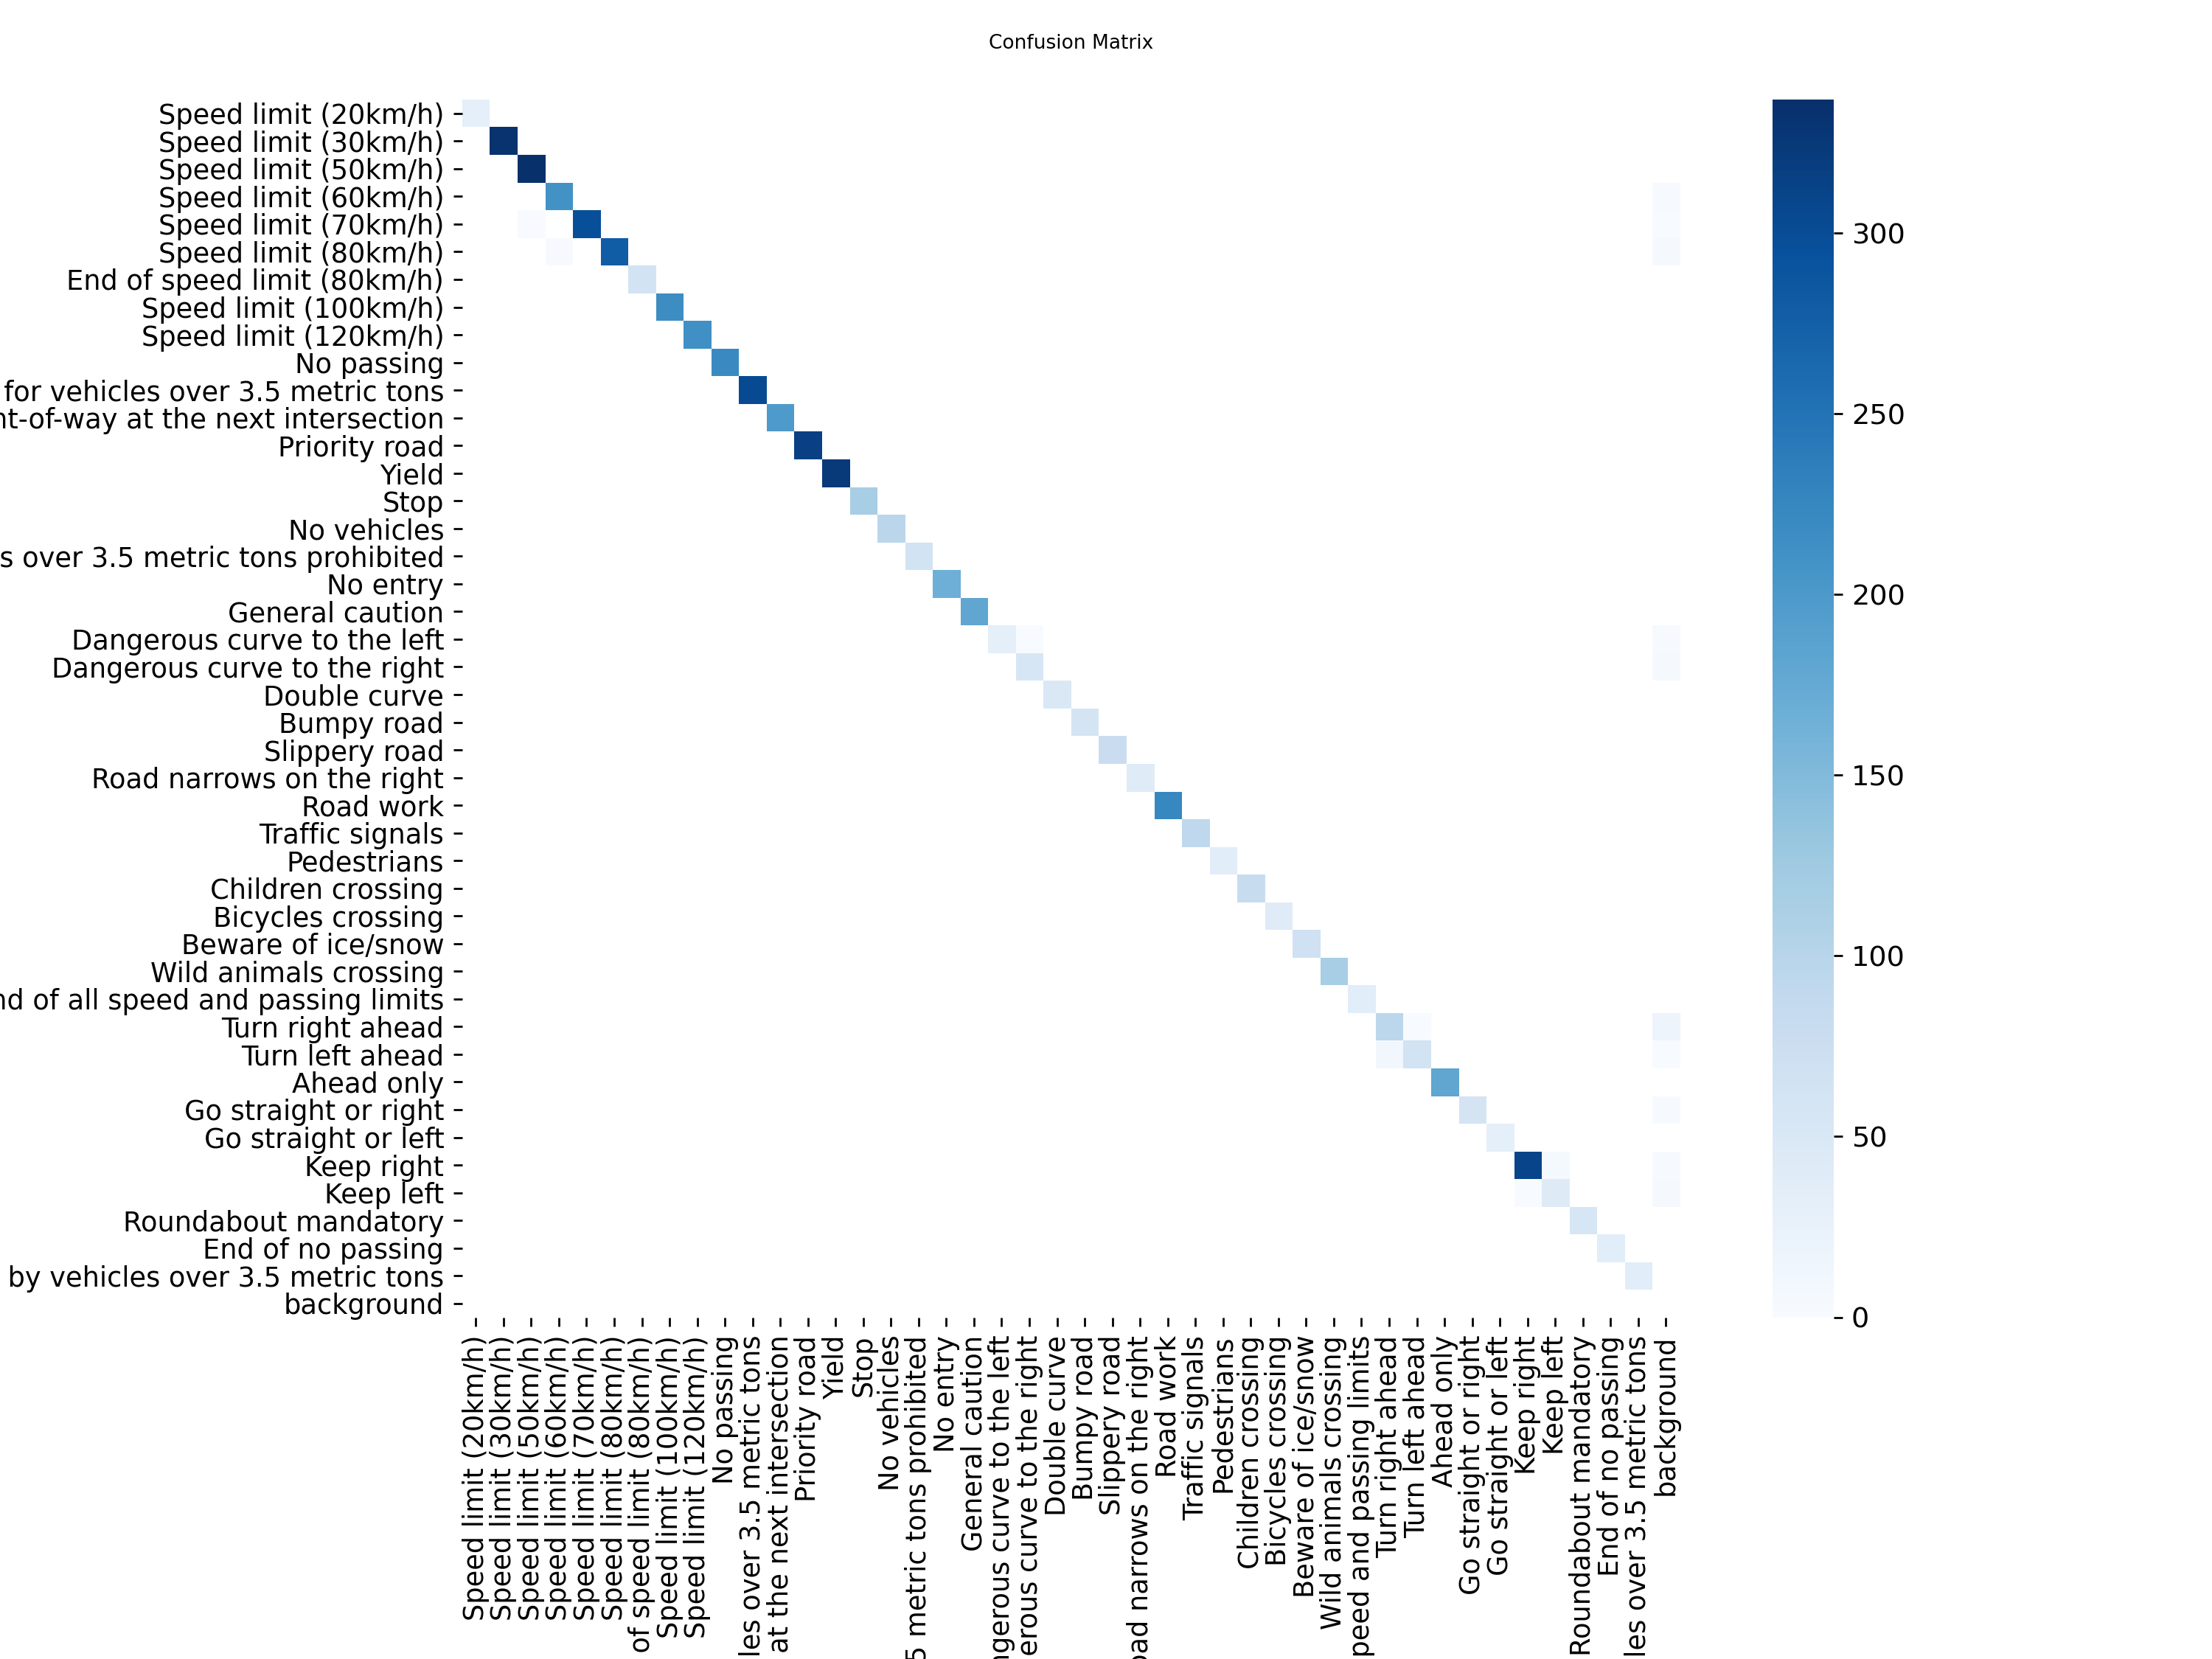

In [6]:
from IPython.display import Image

yolo_model = YOLO("C:/Users/vardh/Desktop/Traffic_Signs/runs/detect/the_yolov8n_model/weights/best.pt")

metrics = yolo_model.val(data= data, split='test', conf = 0.5, iou = 0.5)

Image("runs/detect/val/confusion_matrix.png")


In [7]:
for i, name in metrics.names.items():
    print(f"{name:20s}  Precision: {metrics.box.p[i]:.3f}  Recall: {metrics.box.r[i]:.3f}")

Speed limit (20km/h)  Precision: 1.000  Recall: 1.000
Speed limit (30km/h)  Precision: 1.000  Recall: 1.000
Speed limit (50km/h)  Precision: 1.000  Recall: 0.997
Speed limit (60km/h)  Precision: 1.000  Recall: 0.985
Speed limit (70km/h)  Precision: 0.997  Recall: 1.000
Speed limit (80km/h)  Precision: 0.989  Recall: 1.000
End of speed limit (80km/h)  Precision: 1.000  Recall: 1.000
Speed limit (100km/h)  Precision: 1.000  Recall: 1.000
Speed limit (120km/h)  Precision: 1.000  Recall: 1.000
No passing            Precision: 1.000  Recall: 1.000
No passing for vehicles over 3.5 metric tons  Precision: 1.000  Recall: 1.000
Right-of-way at the next intersection  Precision: 1.000  Recall: 1.000
Priority road         Precision: 1.000  Recall: 1.000
Yield                 Precision: 1.000  Recall: 1.000
Stop                  Precision: 1.000  Recall: 1.000
No vehicles           Precision: 1.000  Recall: 1.000
Vehicles over 3.5 metric tons prohibited  Precision: 1.000  Recall: 1.000
No entry    